In [2]:
%matplotlib inline

import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans
import math
from numpy import dot as dot
import networkx as nx
import matplotlib.pylab as plt
import scipy.sparse as sps
import pandas as pd

data = np.loadtxt('cal500',delimiter = ',')
data.shape
with open('label2.txt') as f:
    label = f.readlines()

In [2]:
class CommunityDetection(object):

    def __init__(self, n_class=10 ):
        self.n_class = n_class

    def fit(self,X):
        
        w,v = LA.eigh(self.laplacian(X))
        self.eigenvalue_ = w 
        self.eigenvector_ = v 
        self.laplacian_ = self.laplacian(X)
        
        Y = np.transpose(self.eigenvector_[1:self.n_class])
        kmeans = KMeans(n_clusters= self.n_class, random_state=0).fit(Y)
        classes = kmeans.labels_
        
        self.index_ = []
        for i in range(self.n_class):
            self.index_.append(np.where(kmeans.labels_==i)[0])
        return self
        
        
    def laplacian(self,X):
        norm = np.sum(X,axis = 0)
        D = np.diag(norm)
        Lap = D - X
        return Lap 


In [3]:
A = data[:,-len(label):]
np.rint(A)

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

# CAL500 Categorical Variables Detection

## This ipython is aim to test multinomial detection algo using cal500

In [5]:
df = pd.DataFrame(np.transpose(A.astype(int)), index = label)
df

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
"""EmotionAngryAgressive01""\n",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""NOTEmotionAngryAgressive01""\n",1,1,1,0,1,0,1,1,1,1,...,1,0,1,1,1,0,1,1,1,1
"""EmotionArousingAwakening01""\n",0,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"""NOTEmotionArousingAwakening01""\n",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
"""EmotionBizarreWeird01""\n",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"""NOTEmotionBizarreWeird01""\n",0,1,1,1,0,0,0,1,1,0,...,1,1,1,1,0,0,1,1,1,1
"""EmotionCalmingSoothing01""\n",0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,0,1,1,0,0,1
"""NOTEmotionCalmingSoothing01""\n",0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"""EmotionCarefreeLighthearted01""\n",0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
"""NOTEmotionCarefreeLighthearted01""\n",0,0,0,1,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0,0,0


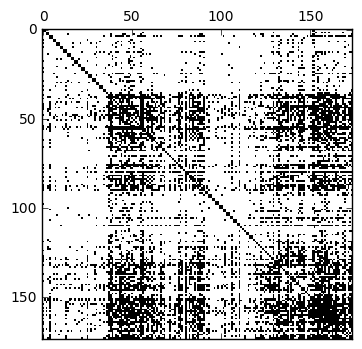

In [6]:
B = np.dot(A.transpose(),A)
B.shape

C = (B==0)
ExclMat = C.astype(int) 
for i in range(0,174): 
    for j in range(0,174):
        if i==j:
            ExclMat[i,j]=1
            
plt.spy(ExclMat) 
plt.show()


# Emotion 

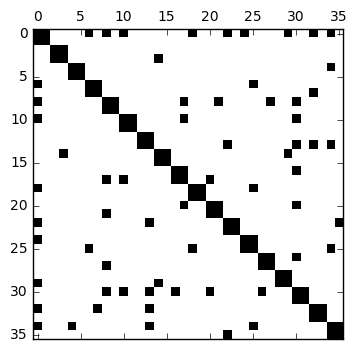

(36, 36)

In [7]:
Emotion = ExclMat[0:36,0:36] #emotion variable 
plt.spy(Emotion)
plt.show()
Emotion.shape

# Song characteristics


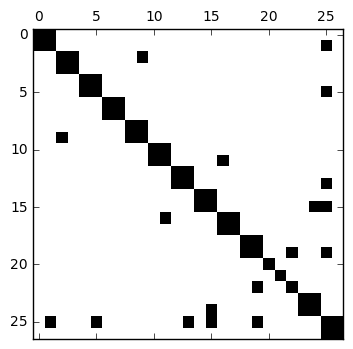

In [8]:
Song = ExclMat[91:118,91:118]
plt.spy(Song)
plt.show()

# Genre 2
## Almost all variable are exclusive. 
## White element means feature i and feature j are not exclusive. However to a small extent (error?)

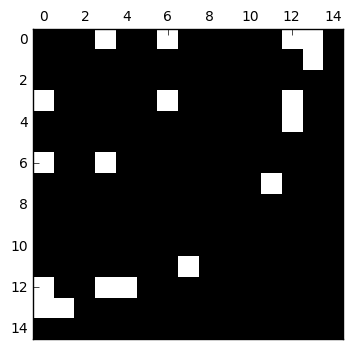

In [9]:
Genre = ExclMat[150:165,150:165] # genre variable 
plt.spy(Genre)
plt.show()

In [10]:
Genre_data =A[:,150:165]
Y = np.sum(Genre_data, axis=1)
print Y  #test if those variable follow multinomial distribution 
print 'number of zeros that sum of category Gener 2'
print np.where(Y==0)[0].shape 
print 'number of ones '
print np.where(Y==1)[0].shape
print 'number of two'
print np.where(Y==2)[0].shape

[ 0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  2.  0.  1.  0.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.
  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.
  0.  0.  2.  1.  0.  1.  1.  1.  0.  2.  0.  0.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  1.  2.  1.  1.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0

# Genre 1

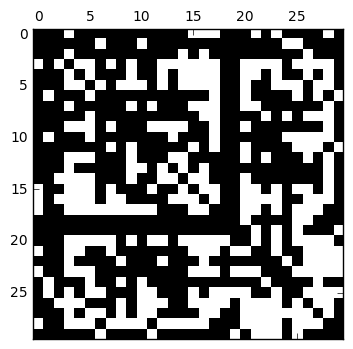

In [11]:
Genre1 = ExclMat[37:67,37:67]
plt.spy(Genre1)
plt.show()

# Community Detection to Exclusion Matrix 
## Laplacian Matrix 

In [12]:
norm = np.sum(ExclMat,axis = 0)
a =  np.divide(np.ones(len(ExclMat)), norm)
b = np.sqrt(a)
D_inv = np.diag(b)
Lap = np.eye(len(ExclMat)) - np.dot(np.dot(D_inv,ExclMat),D_inv)

In [13]:
w,v = LA.eigh(Lap)

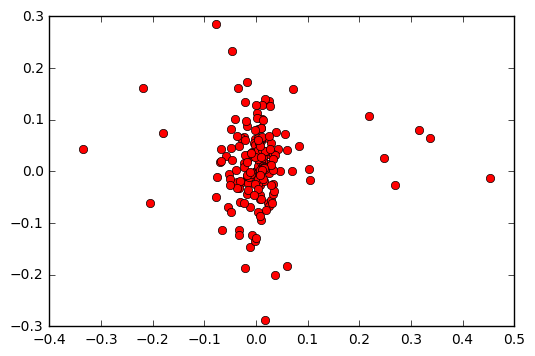

In [14]:
x = v[1:3]
plt.plot(v[1],v[2],'ro')

## K-means

In [15]:
X = np.transpose(v[1:4])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
classes = kmeans.labels_
print classes

[1 1 1 1 1 1 1 0 1 1 2 0 1 0 2 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0]


In [16]:
ind0 = np.where(classes==0)[0]
print ind0 
print len(ind0)
ind1 = np.where(classes ==1)[0]
print ind1
print len(ind1)
ind2 = np.where(classes ==2)[0]
print ind2
print len(ind2)

[  7  11  13  15  17  21  22  25  31  32  34  35  36  39  41  43  44  45
  49  51  52  56  57  58  66  67  70  73  74  75  76  80  81  85  86  88
  91  94  95  97  99 102 104 105 106 108 109 111 113 118 120 123 126 129
 130 131 135 136 139 142 143 148 150 154 155 158 159 161 163 165 166 167
 170 171 173]
75
[  0   1   2   3   4   5   6   8   9  12  20  24  26  27  28  29  30  33
  37  38  40  42  46  47  48  50  53  54  55  59  60  61  62  63  64  65
  68  69  71  72  77  78  79  82  83  84  87  89  90  92  93  96  98 100
 101 103 107 110 112 114 115 116 117 119 121 122 124 125 127 128 132 133
 134 137 138 140 141 144 145 146 147 149 151 152 153 156 157 160 162 164
 168 169 172]
93
[10 14 16 18 19 23]
6


## Class 1

(75, 75)


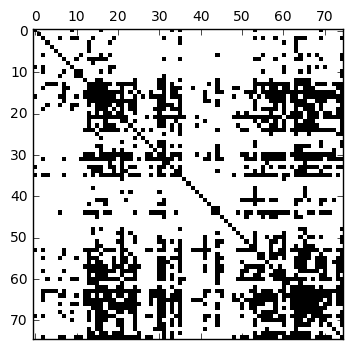

In [18]:
y = ExclMat[np.ix_(ind0,ind0)]
print y.shape
plt.spy(y)
plt.show()

## Class 2


[[1 1 0 ..., 1 1 1]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]
 ..., 
 [1 0 1 ..., 1 1 0]
 [1 0 0 ..., 1 1 0]
 [1 0 0 ..., 0 0 1]]
(93, 93)


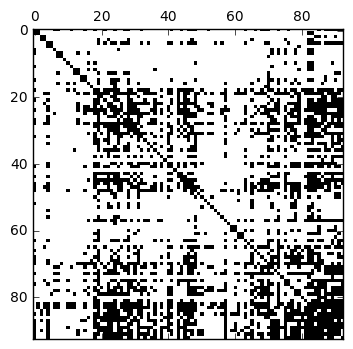

In [19]:
y = ExclMat[np.ix_(ind1,ind1)]
print y
print y.shape
plt.spy(y)
plt.show()

## Class 3

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]]
(6, 6)


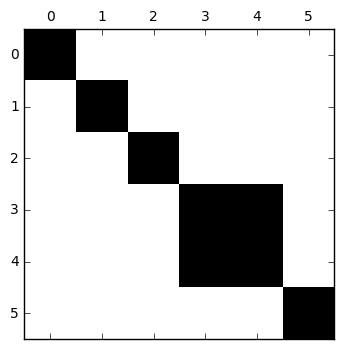

In [20]:
y = ExclMat[np.ix_(ind2,ind2)]
print y
print y.shape
plt.spy(y)
plt.show()

# NP Algorithm

In [21]:
G = nx.from_numpy_matrix(ExclMat)
X = nx.find_cliques(G)
Y = list(X) 

In [22]:
max_clique = []
max_index =[]
for y in Y: 
    if len(y) > len(max_clique):
        max_clique = y 
        max_index =y.index
max_clique = np.sort(max_clique)
print max_clique; 


[ 37  44  47  51  82 137 151 152 158 160 162 164 165 169 173]


In [23]:
for i in max_clique:
    print label[i], i

"GenreAlternativeFolk01"
37
"GenreCountryBlues01"
44
"GenreFunk01"
47
"GenreRootsRock01"
51
"InstrumentSamples01"
82
"VocalsDuet01"
137
"GenreBestMetalHardRock01"
151
"GenreBestPunk01"
152
"GenreBestFolk01"
158
"GenreBestJazz01"
160
"GenreBestRandB01"
162
"GenreBestWorld01"
164
"InstrumentAcousticGuitarSolo01"
165
"InstrumentHarmonicaSolo01"
169
"InstrumentTrumpetSolo01" 173


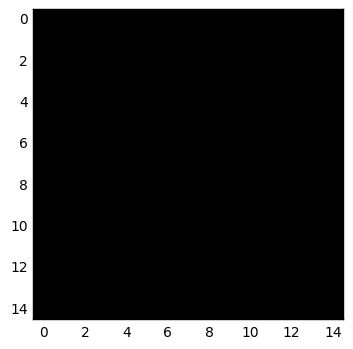

In [24]:
max_clique = np.sort(max_clique)
y = ExclMat[np.ix_(max_clique,max_clique)]
plt.imshow(y,cmap = 'gray')

In [23]:
sparsity = 0
for i in max_clique: 
    sparsity = np.append(sparsity, sum(A[:,i]))
sparsity = sparsity[1:]
sparsity

array([  8.,   6.,  11.,   8.,  32.,   6.,  10.,   9.,   7.,   9.,  13.,
        16.,   6.,   6.,   6.])

# Error caused by sparsity 
## introduce measurement to measure how likely feature i and feature j belong to the same category 

### 1.  For 2 features, more ones, more accruate.

[[   0.  367.    0. ...,    0.   58.   54.]
 [ 367.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [  58.    0.    0. ...,    0.    0.   16.]
 [  54.    0.    0. ...,    0.   16.    0.]]


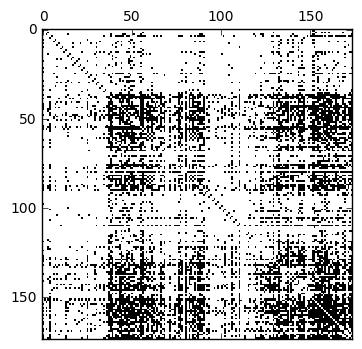

In [30]:
acc = np.zeros(ExclMat.shape); 
for i in range(0,ExclMat.shape[0]):
    for j in range(0,ExclMat.shape[1]):
        if ExclMat[i,j] ==1 and i>j:
            temp = A[:,i] + A[:,j]
            acc[i,j] = np.sum(temp)
            acc[j,i] = acc[i,j]
print acc
plt.spy(acc)
plt.show()

In [31]:
T =acc 

for k in range(100):
    i,j = np.unravel_index(T.argmax(), T.shape)
    print i,':',sum(A[:,i])
    print j,':',sum(A[:,j])
    print 'sum:' , T[i,j]
    print label[i],label[j] 
    T[i,j]=0
    T[j,i]=0;



109 : 444.0
110 : 9.0
sum: 453.0
"SongRecorded01"
"NOTSongRecorded01"

0 : 48.0
1 : 319.0
sum: 367.0
"EmotionAngryAgressive01"
"NOTEmotionAngryAgressive01"

48 : 7.0
112 : 326.0
sum: 333.0
"GenreGospel01"
"SongTextureElectric01"

1 : 319.0
151 : 10.0
sum: 329.0
"NOTEmotionAngryAgressive01"
"GenreBestMetalHardRock01"

1 : 319.0
152 : 9.0
sum: 328.0
"NOTEmotionAngryAgressive01"
"GenreBestPunk01"

99 : 231.0
100 : 93.0
sum: 324.0
"SongHighEnergy01"
"NOTSongHighEnergy01"

4 : 22.0
5 : 296.0
sum: 318.0
"EmotionBizarreWeird01"
"NOTEmotionBizarreWeird01"

72 : 275.0
157 : 40.0
sum: 315.0
"InstrumentDrumSet01"
"GenreBestElectronica01"

116 : 68.0
117 : 246.0
sum: 314.0
"SongVeryDanceable01"
"NOTSongVeryDanceable01"

32 : 104.0
33 : 206.0
sum: 310.0
"EmotionTenderSoft01"
"NOTEmotionTenderSoft01"

5 : 296.0
146 : 10.0
sum: 306.0
"NOTEmotionBizarreWeird01"
"VocalsSpoken01"

22 : 76.0
23 : 230.0
sum: 306.0
"EmotionLovingRomantic01"
"NOTEmotionLovingRomantic01"

6 : 148.0
7 : 154.0
sum: 302.0
"Emot

In [32]:
X = acc 
cd1 = CommunityDetection(n_class = 20)
cd1.fit(X)
cd1.index_
for i in range(len(cd1.index_)):
    index_ = np.sort(cd1.index_[i])
    for j in range(len(cd1.index_[i])):
        print label[index_[j]],index_[j]
    print 'this is '+str(i)+'-th class'
    print '\n'

"GenreFunk01"
47
"GenrePunk01"
50
"GenreSoftRock01"
53
"GenreElectronica01"
59
this is 0-th class


"NOTEmotionPositiveOptimistic01"
27
"GenreSingerSongwriter01"
52
"GenreBluegrass01"
56
"GenrePop01"
63
"NOTSongHeavyBeat01"
98
"NOTSongLike01"
102
"NOTSongPositiveFeelings01"
104
"SongRecommend01"
107
"SongTextureAcoustic01"
111
"SongTextureElectric01"
112
"NOTSongVeryDanceable01"
117
"UsageAtaparty01"
118
"UsageAtwork01"
119
"UsageDriving01"
121
"UsageExercising01"
122
"UsageGoingtosleep01"
124
"UsageRomancing01"
128
"UsageSleeping01"
129
"VocalsAggressive01"
133
"VocalsBreathy01"
135
"VocalsCallandResponse01"
136
"VocalsFalsetto01"
139
"VocalsVocalHarmonies01"
148
"GenreBestAlternative01"
149
"GenreBestPunk01"
152
"GenreBestSoftRock01"
153
"GenreBestSoul01"
154
"GenreBestCountry01"
156
"GenreBestElectronica01"
157
"GenreBestHipHopRap01"
159
"GenreBestRandB01"
162
"InstrumentAcousticGuitarSolo01"
165
"InstrumentElectricGuitar(clean)Solo01"
166
"InstrumentMaleLeadVocalsSolo01"
170
this i

In [33]:
cd1 =CommunityDetection(n_class = 10)
cd1.fit(acc)
cd1.index_

[array([  0,   1,   3,   5,   6,   9,  10,  12,  13,  14,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  32,  33,  34,
         35,  36,  37,  38,  39,  40,  41,  44,  46,  55,  57,  60,  61,
         62,  64,  66,  67,  71,  72,  74,  75,  76,  77,  78,  81,  82,
         84,  87,  88,  90,  92,  93,  94,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173]),
 array([2]),
 array([30]),
 array([ 4, 43, 47, 50, 51, 53, 59, 63, 65, 68, 69, 70]),
 array([31]),
 array([25]),
 array([80, 85, 86, 89, 91, 95, 96]),
 array([58, 73, 79, 83]),
 array([42, 45, 48, 49, 52, 54, 56]),
 array([ 7,  8,

### Error caused by unbalance 

### measure balance and richness at same time 

In [24]:
bal_ratio = np.zeros((ExclMat.shape))
acc_1 = np.zeros((ExclMat.shape))

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0 and i!= j:
            bal_ratio[i,j] = round(4*float(sum(A[:,i])*sum(A[:,j]))/ 502/502,2)
print bal_ratio



[[ 0.    0.24  0.   ...,  0.    0.01  0.  ]
 [ 0.24  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.01  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


In [31]:
T =bal_ratio

for k in range(100):
    i,j = np.unravel_index(T.argmax(), T.shape)
    print i,j, T[i,j]
    print label[i],label[j]
    T[i,j]=0
    T[j,i]=0;

6 7 0.36
"EmotionCalmingSoothing01"
"NOTEmotionCalmingSoothing01"

32 33 0.34
"EmotionTenderSoft01"
"NOTEmotionTenderSoft01"

99 100 0.34
"SongHighEnergy01"
"NOTSongHighEnergy01"

8 21 0.32
"EmotionCarefreeLighthearted01"
"NOTEmotionLightPlayful01"

10 11 0.31
"EmotionCheerfulFestive01"
"NOTEmotionCheerfulFestive01"

16 17 0.29
"EmotionHappy01"
"NOTEmotionHappy01"

95 96 0.29
"SongFastTempo01"
"NOTSongFastTempo01"

18 19 0.28
"EmotionLaidbackMellow01"
"NOTEmotionLaidbackMellow01"

22 23 0.28
"EmotionLovingRomantic01"
"NOTEmotionLovingRomantic01"

14 15 0.27
"EmotionExcitingThrilling01"
"NOTEmotionExcitingThrilling01"

20 21 0.27
"EmotionLightPlayful01"
"NOTEmotionLightPlayful01"

116 117 0.27
"SongVeryDanceable01"
"NOTSongVeryDanceable01"

8 9 0.26
"EmotionCarefreeLighthearted01"
"NOTEmotionCarefreeLighthearted01"

22 35 0.26
"EmotionLovingRomantic01"
"NOTEmotionTouchingLoving01"

34 35 0.26
"EmotionTouchingLoving01"
"NOTEmotionTouchingLoving01"

7 32 0.25
"NOTEmotionCalmingSoothing01"

In [27]:
cd2= CommunityDetection(n_class = 20)
cd2.fit(bal_ratio)
cd2.index_

[array([ 70,  75,  82,  88,  89, 118, 122, 124, 126]),
 array([  1,  11,  26,  44,  49,  67,  71,  83,  94,  98,  99, 108, 113,
        127, 128, 135, 137, 144, 146, 154, 159]),
 array([  0,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,  15,
         17,  21,  23,  30,  31,  34,  35,  39,  42,  48,  51,  59,  65,
         66,  73,  76,  77,  79,  80,  81,  84,  86,  87,  91,  92,  93,
         95, 100, 101, 102, 103, 104, 106, 107, 111, 112, 116, 120, 121,
        123, 125, 129, 130, 131, 133, 134, 136, 138, 139, 140, 141, 142,
        143, 145, 147, 150, 152, 153, 157, 162]),
 array([155]),
 array([114, 115, 117]),
 array([16, 25, 28, 37, 45, 47, 74, 85]),
 array([149]),
 array([173]),
 array([164, 168]),
 array([9]),
 array([165, 167]),
 array([161, 163, 166, 171]),
 array([ 40,  43,  52,  53,  54,  55,  60,  61,  64,  69,  72,  96, 105]),
 array([18, 19, 20, 27, 36]),
 array([109, 110]),
 array([158, 160, 172]),
 array([170]),
 array([ 22,  24,  29,  32,  33,  41,  46,  56,

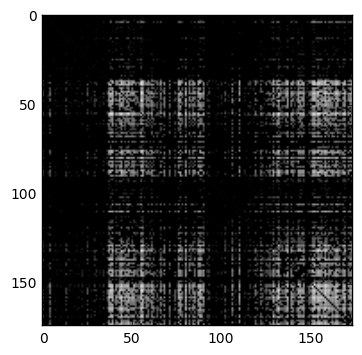

In [32]:
nbhd = np.zeros(ExclMat.shape)

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0:
            if i!=j:
                nbhd[i,j] = np.dot(ExclMat[:,i],ExclMat[:,j])
plt.imshow(nbhd,cmap = 'gray')

In [29]:
acc_2 = np.zeros(ExclMat.shape)

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0 and i!=j:
            nbhd_ij = np.where(ExclMat[:,i]+ExclMat[:,j]==2)
            for k in range(len(nbhd_ij[0])):
                acc_2[i,j] += sum(A[:,nbhd_ij[0][k]])
print acc_2

[[    0.   367.     0. ...,     0.   305.   641.]
 [  367.     0.     0. ...,     0.     0.     0.]
 [    0.     0.     0. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,     0.     0.     0.]
 [  305.     0.     0. ...,     0.     0.  1711.]
 [  641.     0.     0. ...,     0.  1711.     0.]]
